In [106]:
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta
%matplotlib notebook

In [107]:
ticker = "AAPL"
start = datetime.now() - timedelta(days=730)
data = pdr.get_data_yahoo(ticker, start)
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-06-03,81.550003,80.574997,81.165001,81.279999,104491200.0,80.277351
2020-06-04,81.404999,80.195000,81.097504,80.580002,87560400.0,79.585991
2020-06-05,82.937500,80.807503,80.837502,82.875000,137250400.0,81.852676
2020-06-08,83.400002,81.830002,82.562500,83.364998,95654400.0,82.336624
2020-06-09,86.402496,83.002502,83.035004,85.997498,147712400.0,84.936661


### % change


In [108]:
data["%-chg"] = data["Close"].pct_change()
data.head()

,High,Low,Open,Close,Volume,Adj Close,%-chg
Date,,,,,,,
2020-06-03,81.550003,80.574997,81.165001,81.279999,104491200.0,80.277351,NaN
2020-06-04,81.404999,80.195000,81.097504,80.580002,87560400.0,79.585991,-0.008612
2020-06-05,82.937500,80.807503,80.837502,82.875000,137250400.0,81.852676,0.028481
2020-06-08,83.400002,81.830002,82.562500,83.364998,95654400.0,82.336624,0.005912
2020-06-09,86.402496,83.002502,83.035004,85.997498,147712400.0,84.936661,0.031578


### Log returns

In [109]:
data["Log returns"] = np.log(data["Close"]/data["Close"].shift())

In [110]:
data.head()

,High,Low,Open,Close,Volume,Adj Close,%-chg,Log returns
Date,,,,,,,,
2020-06-03,81.550003,80.574997,81.165001,81.279999,104491200.0,80.277351,NaN,NaN
2020-06-04,81.404999,80.195000,81.097504,80.580002,87560400.0,79.585991,-0.008612,-0.008649
2020-06-05,82.937500,80.807503,80.837502,82.875000,137250400.0,81.852676,0.028481,0.028083
2020-06-08,83.400002,81.830002,82.562500,83.364998,95654400.0,82.336624,0.005912,0.005895
2020-06-09,86.402496,83.002502,83.035004,85.997498,147712400.0,84.936661,0.031578,0.031090


### Volatility

In [111]:
volatility = data["Log returns"].std()*252**.5
volatility

0.3188224797722919

In [112]:
str_vol = str(round(volatility, 4)*100)
str_vol

'31.879999999999995'

<IPython.core.display.Javascript object>


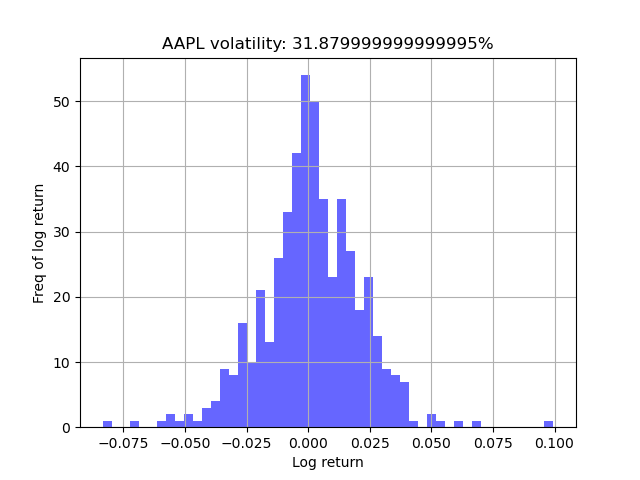

Text(0.5, 1.0, 'AAPL volatility: 31.879999999999995%')

In [113]:
fix , ax = plt.subplots()
data["Log returns"].hist(ax=ax, bins=50, alpha=0.6, color="blue")
ax.set_xlabel("Log return")
ax.set_ylabel("Freq of log return")
ax.set_title("AAPL volatility: " + str_vol + "%")

### Moving avarages

In [123]:
data["MA200"] = data["Close"].rolling(200).mean()
data["EMA200"] = data["Close"].ewm(span=200, adjust=False).mean()
data["MA50"] = data["Close"].rolling(50).mean()
data["EMA50"] = data["Close"].ewm(span=50, adjust=False).mean()
data.tail()

,High,Low,Open,Close,Volume,Adj Close,%-chg,Log returns,MA200,EMA200,MA50,EMA50
Date,,,,,,,,,,,,
2022-05-26,144.339996,137.139999,137.389999,143.779999,90601500.0,143.779999,0.023200,0.022934,159.49625,156.486574,160.794401,155.992172
2022-05-27,149.679993,145.259995,145.389999,149.639999,90978500.0,149.639999,0.040757,0.039948,159.50000,156.418449,160.574801,155.743067
2022-05-31,150.660004,146.839996,149.070007,148.839996,103718400.0,148.839996,-0.005346,-0.005361,159.49870,156.343041,160.272001,155.472358
2022-06-01,151.740005,147.679993,149.899994,148.710007,74286600.0,148.710007,-0.000873,-0.000874,159.48665,156.267091,159.938601,155.207168
2022-06-02,151.270004,146.860001,147.830002,151.210007,72232000.0,151.210007,0.016811,0.016671,159.49175,156.216772,159.586401,155.050417


<IPython.core.display.Javascript object>


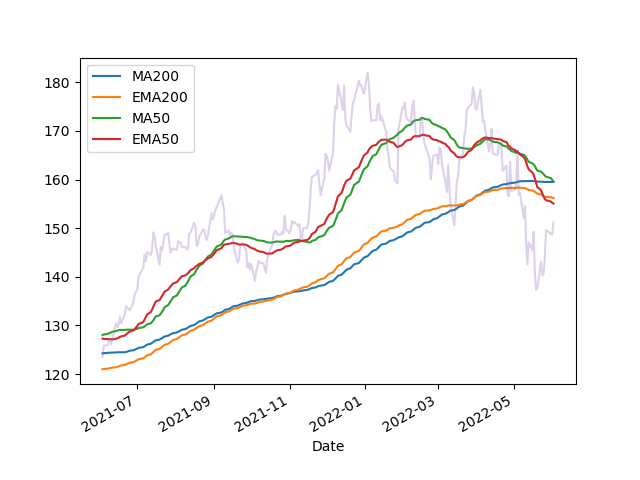

<AxesSubplot:xlabel='Date'>

In [125]:
fig, ax = plt.subplots()
data[["MA200", "EMA200", "MA50", "EMA50"]].loc["2021-06-03":].plot(ax=ax)
data["Close"].loc["2021-06-03":].plot(ax=ax, alpha=0.3)

### MACD

- MACD: 12-period EMA - 26-period EMA
- Signal line: 9-period EMA of MACD

In [126]:
# Exp moving avarage from 12 and 26 days period
exp1 = data["Close"].ewm(span=12, adjust=False).mean()
exp2 = data["Close"].ewm(span=26, adjust=False).mean()

data["MACD"] = exp1 - exp2
data["Signal line"] = data["MACD"].ewm(span=9, adjust=False).mean()
data.tail()

,High,Low,Open,Close,Volume,Adj Close,%-chg,Log returns,MA200,EMA200,MA50,EMA50,MACD,Signal line
Date,,,,,,,,,,,,,,
2022-05-26,144.339996,137.139999,137.389999,143.779999,90601500.0,143.779999,0.023200,0.022934,159.49625,156.486574,160.794401,155.992172,-5.898346,-5.815683
2022-05-27,149.679993,145.259995,145.389999,149.639999,90978500.0,149.639999,0.040757,0.039948,159.50000,156.418449,160.574801,155.743067,-5.037248,-5.659996
2022-05-31,150.660004,146.839996,149.070007,148.839996,103718400.0,148.839996,-0.005346,-0.005361,159.49870,156.343041,160.272001,155.472358,-4.369012,-5.401799
2022-06-01,151.740005,147.679993,149.899994,148.710007,74286600.0,148.710007,-0.000873,-0.000874,159.48665,156.267091,159.938601,155.207168,-3.806045,-5.082648
2022-06-02,151.270004,146.860001,147.830002,151.210007,72232000.0,151.210007,0.016811,0.016671,159.49175,156.216772,159.586401,155.050417,-3.122170,-4.690553


<IPython.core.display.Javascript object>


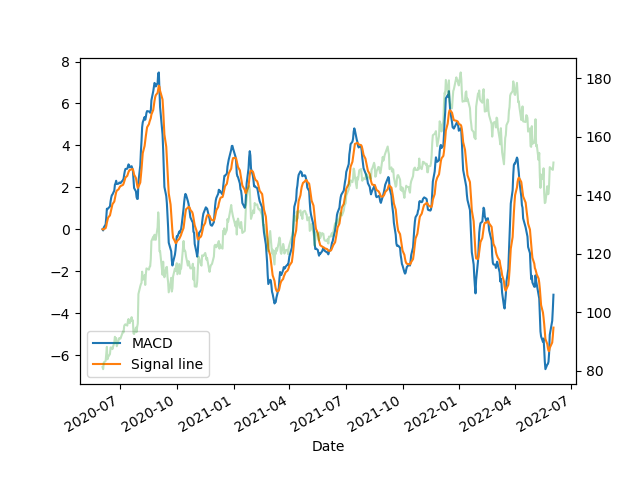

<AxesSubplot:>

In [129]:
fig, ax = plt.subplots()
data[["MACD", "Signal line"]].plot(ax=ax)
data["Close"].plot(ax=ax, alpha=0.3, secondary_y=True)

### Stockhastic oscillator

- 14-high: Maximum of last 14 trading days
- 14-low: Minimum of last 14 trading days
- %K: (last close - 14-low)*100 / (14-high - 14-low)
- %D: Simple Moving Avarage of %K
    

In [131]:
high14 = data["High"].rolling(14).max()
low14 = data["Low"].rolling(14).min()
data["%K"] = (data["Close"] - low14)*100 / (high14 - low14)
data["%D"] = data["%K"].rolling(3).mean()